# W2 Etherum Notes

## Ethereum Whitepaper

Contains Note from [Ethereum Whitepaper](https://ethereum.org/en/whitepaper)

- Bitcoin has no "intrinsic value"
- No centralized issuer or controller
  
- Attention is drawn to the underlying blockchain architechture as a distributed consensus
- Ethereum intends to provide a blockchain with a Turing-complete programming language that can be used to create "contracts" that can be used to encode arbitrary state transition functions

## History
- Anonymous e-cash protocols
- Chaumian blinding
- b-money
- Reusable proofs of work
- Finally, proof-of-work
  - Consensus algorithm
  - Allowing free entry
  - Alternative proof-of-stake
  - Both can be used to serve as the backbone of a cryptocurrency
   

## Bitcoin As A State Transition System
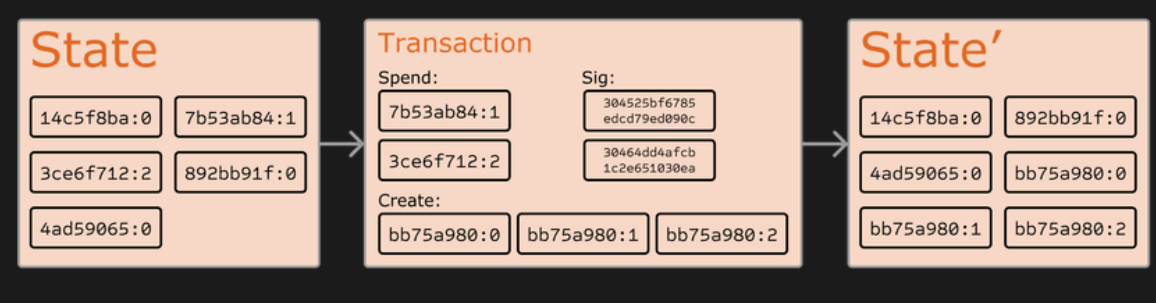

- The ledger can be thought of as a state transition system
- Ex. APPLY(S,TX) -> S' or ERROR
- APPLY({ Alice: $50, Bob: $50 },"send $20 from Alice to Bob") = { Alice: $30, Bob: $70 }

- The "state" in Bitcoin is the collection of all coins ("Unspent Transaction Outputs - UTXO")

State transition function is roughly:

1. For each input in TX:
   - If the referenced UTXO is not in S, return an error.
   - If the provided signature does not match the owner of the UTXO, return an error.
2. If the sum of the denominations of all input UTXO is less than the sum of the denominations of all output UTXO, return an error.
3. Return S with all input UTXO removed and all output UTXO added.
   
The first half of the first step prevents transaction senders from spending coins that do not exist, the second half of the first step prevents transaction senders from spending other people's coins, and the second step enforces conservation of value. In order to use this for payment, the protocol is as follows. Suppose Alice wants to send 11.7 BTC to Bob. First, Alice will look for a set of available UTXO that she owns that totals up to at least 11.7 BTC. Realistically, Alice will not be able to get exactly 11.7 BTC; say that the smallest she can get is 6+4+2=12. She then creates a transaction with those three inputs and two outputs. The first output will be 11.7 BTC with Bob's address as its owner, and the second output will be the remaining 0.3 BTC "change", with the owner being Alice herself.

## Mining

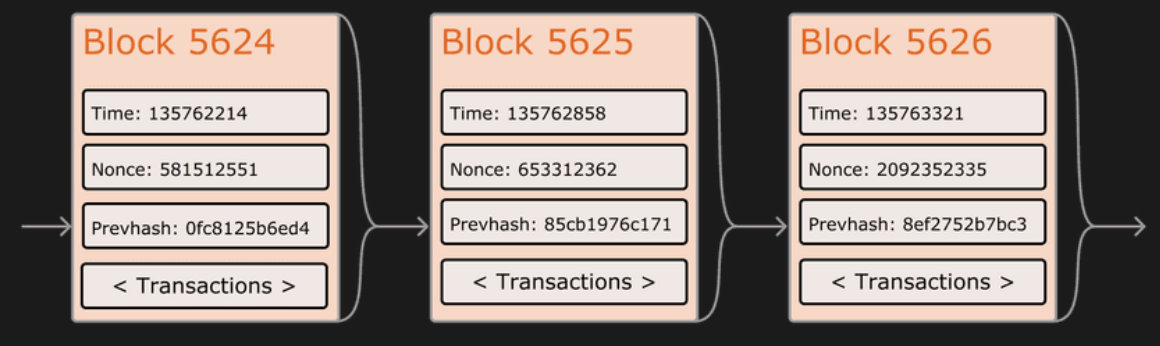

- "Blocks" are packages of transactions 
- The network is intended to produce roughly one block every ten minutes
- Each block contains a 
  - timestamp, 
  - a nonce, 
  - a reference (hash) to the previous block
  - list of all of the transactions since the previous block
  - Forming a block-chain over time

Means to check block validity:
1. Check if the previous block referenced by the block exists and is valid.
2. Check that the timestamp of the block is greater than that of the previous blockfn2 and less than 2 hours into the future
3. Check that the proof-of-work on the block is valid.
4. Let S[0] be the state at the end of the previous block.
5. Suppose TX is the block's transaction list with n transactions. For all i in 0...n-1, set S[i+1] = APPLY(S[i],TX[i]) If any application returns an error, exit and return false.
6. Return true, and register S[n] as the state at the end of this block.

Note that the state is not encoded in the block in any way; it is purely an abstraction to be remembered by the validating node and can only be (securely) computed for any block by starting from the genesis state and sequentially applying every transaction in every block.

- If there are two transactions A and B in a block such that B spends a UTXO created by A, then the block will be valid if A comes before B but not otherwise.
- Use of double-SHA256 hash for "proof-of-work"
- At the current target of ~2^187, the network must make an average of ~2^69 tries before a valid block is found;
- Target is recalibrated every 2016 blocks, in general, to reach the new block per 10 minute goal
- Miner gets 25BTC for reward + "transaction fee"

## Merkle Trees

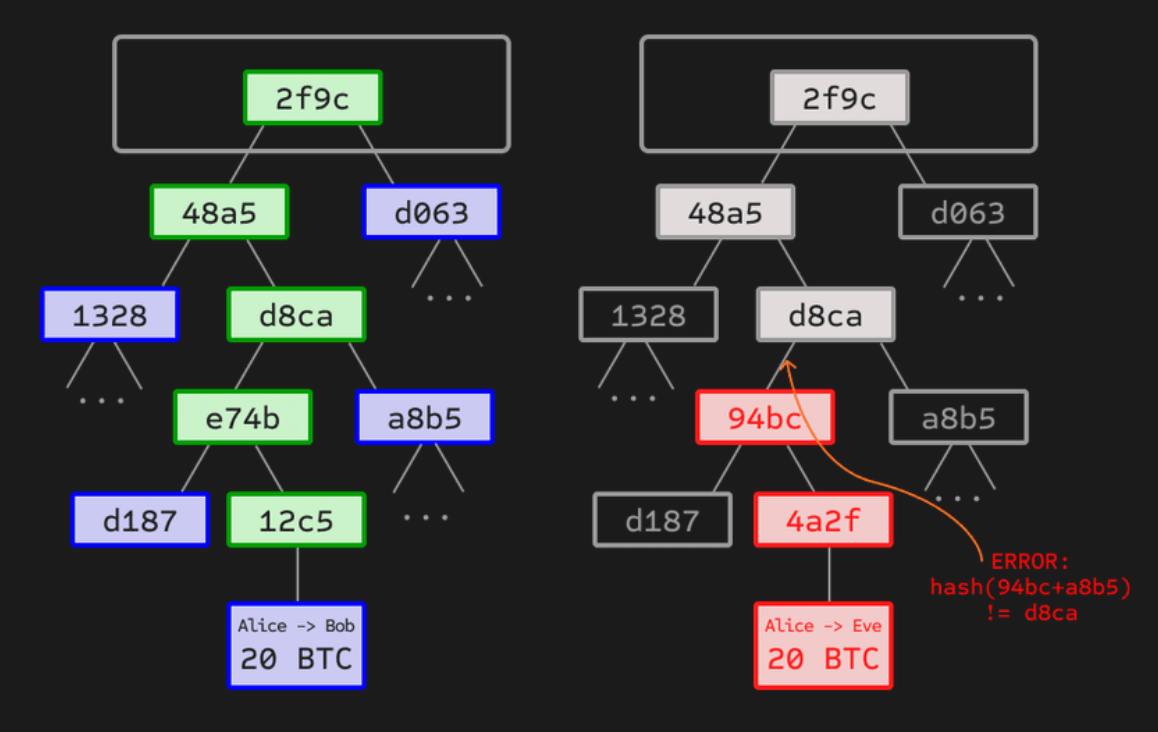

Left: it suffices to present only a small number of nodes in a Merkle tree to give a proof of the validity of a branch.

Right: any attempt to change any part of the Merkle tree will eventually lead to an inconsistency somewhere up the chain.

Block is stored in a multi-level data structure. 
The "hash" of a block is actually only the hash of the block header, a roughly 200-byte piece of data that contains 
- the timestamp, 
- nonce, 
- previous block hash and
- the root hash of a data structure called the Merkle tree storing all transactions in the block.

A Merkle tree is a type of binary tree, composed of a set of nodes with a large number of leaf nodes at the bottom of the tree containing the underlying data, a set of intermediate nodes where each node is the hash of its two children, and finally a single root node, also formed from the hash of its two children, representing the "top" of the tree.

- The purpose is to allow the data in a block to be delivered piecemeal
- if a malicious user attempts to swap in a fake transaction into the bottom of a Merkle tree, this change will cause a change in the node above, and then a change in the node above that, finally changing the root of the tree and therefore the hash of the block, causing the protocol to register it as a completely different block 
- Essential to long-term sustainability
- A "full node" in the bitcoin network is about 15GB of disk space as of Apr 2014
- Growing by >1GB per month
- Simplified payment verification (SPV)
- Security with downloading small portion of the entire blockchain

## Alternative Blockchain Applications

- 2005, Nick Szabo, Secure property titles with owner authority
- 2009, after Bitcoin decentralized consensus, alternative applications began to emerge

- Namecoin, decentralized name registration database, First-to-file paradigm
- Colored coins, allow people to create their own digital currencies; Publically assign a color to a specific Bitcoin UTXO
- Metacoins, Bitcoin with different state transition function; An arbitrary cryptocurrency protocol

Consensus protocol approaches:
- Building an independent network
- Building a protocol on top of Bitcoin

## Scripting

Limitations
- Lack of Turing-completeness -> missing loops -> lead to scripts that are space-inefficient
- Value-blindness
- Lack of state -> Hard to make multi-stage options contracts; Withdrawal limits is impossible
- Blockchain-blindness 

Approaches:
- Building a new blockchain
- Use scripting on top of Bitcoin
- Building a meta-protocol on top of Bitcoin

# Ethereum - an alternative framework

Emphasis on:
- rapid development time
- Security for small and rarely used applications
- Ability of different applications to efficiently interact

Done through:
- Building the ultimate abstract foundational layer
- Blockchain with a Turing-complete programming language
- Allow anyone to write smart contracts and decentralized applications
- Create their own arbitrary rules for ownership, TX formats, and state transition functions
- Turing-completeness, value-awareness, blockchain-awareness

## Ethereum Accounts

The state contains objects called *accounts*, each having 20-byte address
- State transition are direct transfers of value and info between accounts
- Contains 4 fields
- The nonce, a counter used to make sure each transaction can only be processed once
- The account's current ether balance
- The account's contract code, if present
- The account's storage (empty by default)


Two types of accounts in general
- Externally owned accounts
- Contract accounts
- Contracts are like autonomous agents, execute actions(code) when pinged by message or TX

## Messages in Transactions

### "Transaction" - Signed data package that stores message to be sent from an Externally owned account

Contains:
- The recipient of the message
- A signature identifying the sender
- The amount of ether to transfer from the sender to the recipient
- An optional data field
- A STARTGAS value, representing the maximum number of computational steps the transaction execution is allowed to take
- A GASPRICE value, representing the fee the sender pays per computational step

Data field could be optionally used for registering, for example

STARTGAS, GASPRICE, and Ethereum's anti-denial of service model
- Avoid infinite loops or other computational wastage in code
- Requires a limit to how many computational steps of code execution it can use
- Fundamental unit of computation is "gas",
- Fee of 5 gas for every byte in the transaction data
- Intent is to require an attacker to pay proportionately for every resource they consume (bandwidth, storage, computation)
- Any transaction that leads to the network consuming more resources will result in proportionally larger gas fee

## Messages

Contracts can send "messages" to other contracts

Messages are:
- Virtual object that only exist in the execution environment
- Contains
  - Sender of the msg (implicit)
  - Recipient of the msg
  - Amount of ether to transfer alongside the msg
  - Optional data field
  - STARTGAS value
  
Essentially, a message is like a transaction, except it is produced by a contract and not an external actor.

A message is produced when a contract account executes the CALL opcode

Note that the gas allowance assigned by a transaction or contract applies to the total gas consumed by that transaction and all sub-executions. For example, if an external actor A sends a transaction to B with 1000 gas, and B consumes 600 gas before sending a message to C, and the internal execution of C consumes 300 gas before returning, then B can spend another 100 gas before running out of gas.

## Ethereum State Transition Function (STF)

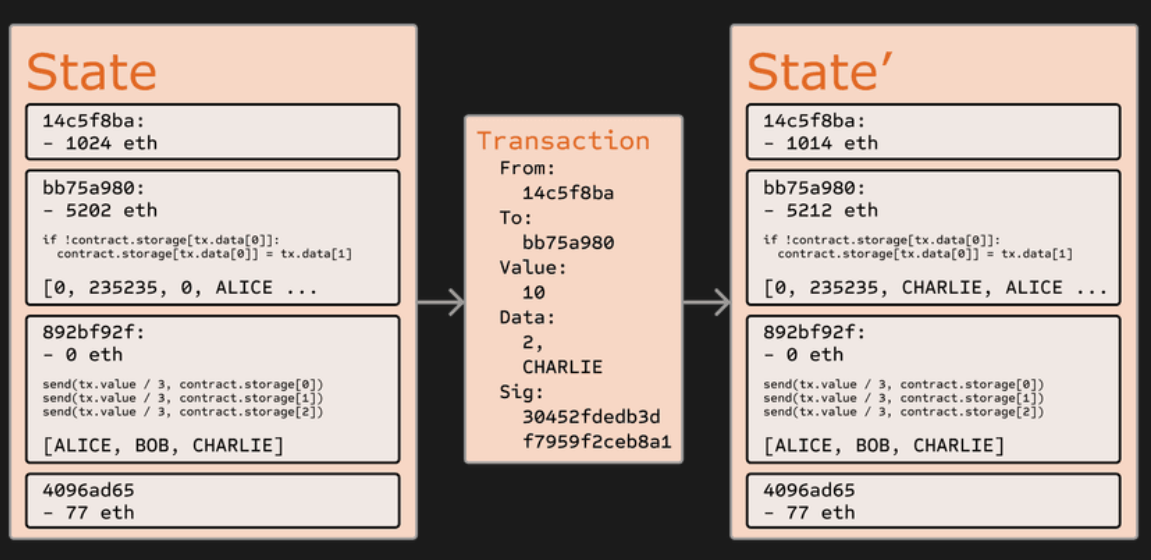


1. Check if the transaction is well-formed (ie. has the right number of values), the signature is valid, and the nonce matches the nonce in the sender's account. If not, return an error.
2. Calculate the transaction fee as STARTGAS * GASPRICE, and determine the sending address from the signature. Subtract the fee from the sender's account balance and increment the sender's nonce. If there is not enough balance to spend, return an error.
3. Initialize GAS = STARTGAS, and take off a certain quantity of gas per byte to pay for the bytes in the transaction.
4. Transfer the transaction value from the sender's account to the receiving account. If the receiving account does not yet exist, create it. If the receiving account is a contract, run the contract's code either to completion or until the execution runs out of gas.
5. If the value transfer failed because the sender did not have enough money, or the code execution ran out of gas, revert all state changes except the payment of the fees, and add the fees to the miner's account.
6. Otherwise, refund the fees for all remaining gas to the sender, and send the fees paid for gas consumed to the miner.

## Code Execution

- EVM Code
- Can store data in to stack, Memory, Contract's long-term storage (key/value store)
- Can also access value, sender and data of incoming message, and block header data, return a byte array of data as output

Computational state can be defined as:
(block_state, transaction, message, code, memory, stack, pc, gas)

- block_state: the global state containing all accounts and includes balances and storage
- The current instruction is found by taking the pc_th byte of code (or 0 if pc >= len(code))
- Example instructions: 
  - ADD pops two items off the stack and pushes their sum, reduces gas by 1 and increments pc by 1,
  - SSTORE pops the top two items off the stack and inserts the second item into the contract's storage at the index specified by the first item.

## Blockchain and Mining

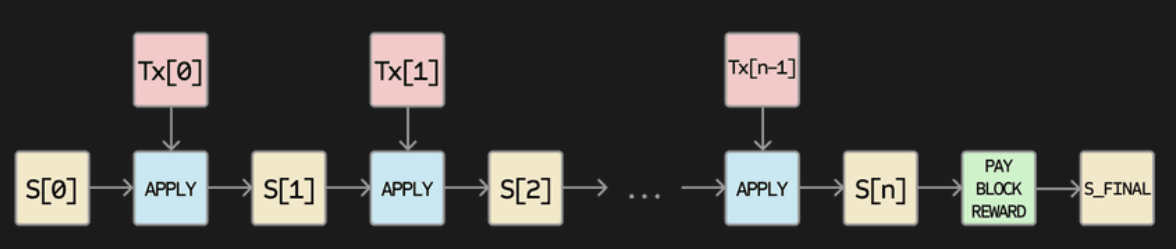

Different from Bitcoin blockchain:
- Ethereum blocks contain a copy of the transaction list
- the most recent state
- block number
- difficulty

Validation algorithm:
1. Check if the previous block referenced exists and is valid.
2. Check that the timestamp of the block is greater than that of the referenced previous block and less than 15 minutes into the future
3. Check that the block number, difficulty, transaction root, uncle root and gas limit (various low-level Ethereum-specific concepts) are valid.
4. Check that the proof-of-work on the block is valid.
5. Let S[0] be the state at the end of the previous block.
6. Let TX be the block's transaction list, with n transactions. For all i in 0...n-1, set S[i+1] = APPLY(S[i],TX[i]). If any applications returns an error, or if the total gas consumed in the block up until this point exceeds the GASLIMIT, return an error.
7. Let S_FINAL be S[n], but adding the block reward paid to the miner.
8. Check if the Merkle tree root of the state S_FINAL is equal to the final state root provided in the block header. If it is, the block is valid; otherwise, it is not valid.

Patricia tree includes efficient insert and delete to Merkle Tree 

## Applications

Three types:
- Financial
- Semi-finacial applications
- Non-financial

Token Systems


... Rest are omitted, too much gibberish smh